# Bank Marketing Campaign 

## Context

#### The types of financial products used by the public are more varied. One financial product that is well-known to the public is term deposits. The term deposit mechanism is that a customer deposits a sum of money at a bank or a financial institution, and the money can only be withdrawn after a certain period of time. As compensation, customers will be given a fixed interest according to the nominal amount of money deposited.

#### Nevertheless, as business entities with financial products and respective customers, banks still have to compete to not lose customers. One of the ways to acquire new customers is by conducting a marketing campaign.


## Features

### Customer Profile <br>
age, job, balance, housing, loan <br>


### Marketing Data <br>
contact: Contact communication type. <br>
month: Last contact month of the year. <br>
campaign: Number of contacts performed during this campaign and for this client. <br>
pdays: Number of days after the client was contacted from the previous campaign. <br>
poutcome: Outcome of the previous marketing campaign. <br>
deposit: Whether the customer deposits or not. <br>

## What This Model Does <br>
The goal of the model is to identfy customers who are most likely to subscribe to a term deposit,based on their demographic profile and  the results of previous marketing campaigns.

## How This Model Can Helps the Business? <br>
1. Predict customer behaviour: <br>
The model preducts which customers are most likely to subscibe to a term deposit, helping with targeted marketing efforts. <br>
2. Identify Key Influencing Factors: <br>
By analyzing the importance of features, themodel helps identify which factors most influence a customer's decision to subscribe <br>
3. Optimize Marketing Budget: <br>
The model improves efficiency by focusing marketing efforts on high potential customers, reducing costs associatedwith contacting unlikely customers. <br>
4. Improve Campaign Succes Rates and ROI <br>
By targeting customers more effectively, the model can increase the conversion rate leading to more successful campaigns <br>
5. Enhance Customer Insights : <br>
Beyond predicting outcomes, the model provides actionable insights into customer behaviour which can help inform broader business strategies in the future. 

## Business Understanding <br>
This model works best when the marketing team has the flexibility to run broad or non-targeted campaigns initially. These campaigns serve to gather responses from a wide customer base, providing valuable data on customer behavior and preferences. This data can then be used as a baseline to train the model effectively. Over time, the marketing team can transition to more focused and targeted campaigns, improving efficiency and reducing costs while maintaining or increasing customer acquisition rates.

## Model Limitation <br>
1. Better for Customers with Past History <br>
This model is more reliable for predicting customers who have history with the bank. The availability of historical data helps themodel identify patterns and make more accurate predictions <br>
2. Less Reliable for New Customers: <br>
For cutsomer with no prior history or interaction data, the model's predictions are less reliable. <br>
3. Potential Mitigation: <br>
To improvve predictions for new customers, themodel could be supplemened with external data or alternative features that capture general trends across similar customer segments <br>
For example: Group new customers by attributes like job, age_binned, education_level and use the average behaviour of each group for predictions. But this scenario will  not be covered here.

In [2]:
#Import library 
import pandas as pd 
import numpy as np

In [3]:
file_path = "/Users/belamoneta/jcds-0412/jcds-0412/Modul 3/Exercise/Capstone/data_bank_marketing_campaign.csv"
df = pd.read_csv(file_path)
print(df.head())


   age            job  balance housing loan    contact month  campaign  pdays  \
0   55         admin.     1662      no   no   cellular   jun         2     -1   
1   39  self-employed    -3058     yes  yes   cellular   apr         3     -1   
2   51         admin.     3025      no   no   cellular   may         1    352   
3   38       services      -87     yes   no   cellular   may         1     -1   
4   36      housemaid      205     yes   no  telephone   nov         4     -1   

  poutcome deposit  
0  unknown     yes  
1  unknown     yes  
2    other     yes  
3  unknown      no  
4  unknown      no  


In [4]:
#lets get an overview of column types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


In [5]:
#check for missing values across all features 
df.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

#### As you can see w ehave no missing values in the dataset

In [6]:
#lets check the summay of he dataset 
df.describe()

,age,balance,campaign,pdays
count,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550
std,11.919710,3089.291831,2.727001,108.072739
min,18.000000,-6847.000000,1.000000,-1.000000
25%,32.000000,127.000000,1.000000,-1.000000
50%,39.000000,549.000000,2.000000,-1.000000
75%,49.000000,1684.000000,3.000000,40.000000
max,95.000000,66653.000000,63.000000,854.000000


#### As you can see in the dataset we have both categorical and also numerical columns. Now lets check the distribution of these categoical columns and their frequency 

In [7]:
df.head()

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


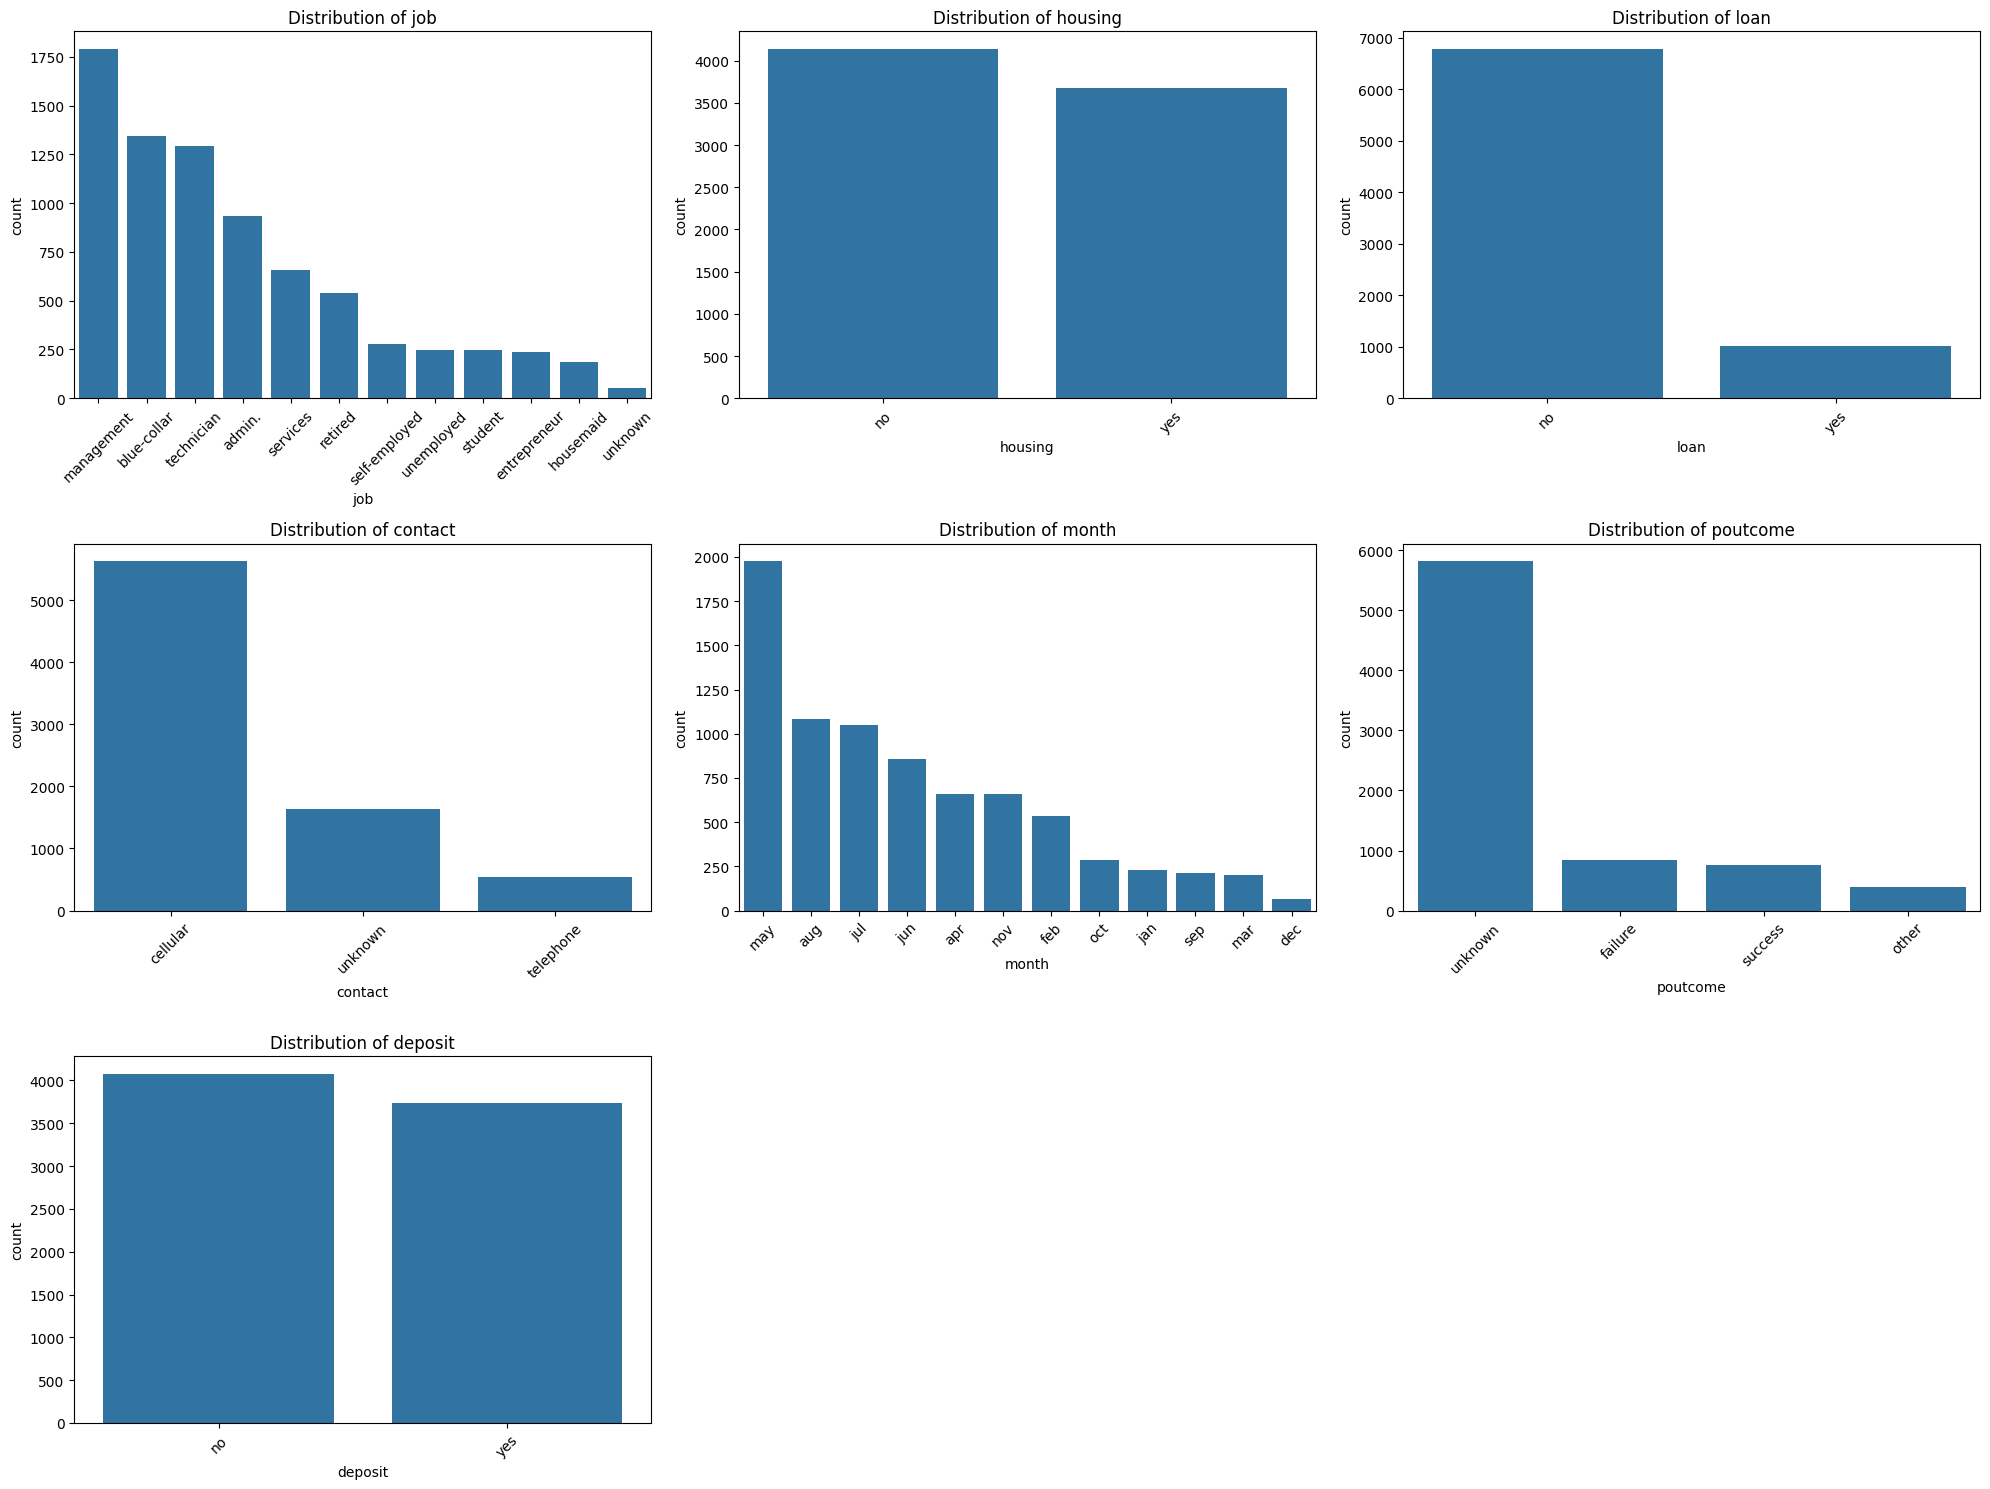

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns 

# List of categorical features to visualize
categorical_col = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Define the layout for subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()  # Flatten the grid layout

# Loop through features and create bar plots
for i, col in enumerate(categorical_col):
    sns.countplot(x=col, data=df, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots (if any)
for j in range(len(categorical_col), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#### Insights:
#### 

#### 1. Most common job are management, blue colar, and technician. We may need to reducing the number of category in this column by grouping similar job possibility of our model to be overfitting 
#### 2. On the distribution month graph, we can see that may have the highest customer contact volume. Through this visual, we can assume that seasonal pattern in customer outreach may exist 
#### 3. On  the distribution of the house column, we can see equal distribution of customers with housing loans (Yes vs No). This could indicate that with or without a housing loan it may not significantly effect the term of subscriving to the term deposit. However we need to confirm this with by checking the correlation with the deposit column 
#### 4. From the graph abpve we also can see that most of our customers do not have a personal loan (significanty majority are "NO"). 
#### 5. From the contact graph we also can see that celullar contact is the dominant communication type 
#### 6. As we can see we majority dont  know theoutcome of the previous campaign as "unknown" being the one with the highest count.

#### This dataset also have numerical columns, lets see the distribution of these numerical columns with histogram 

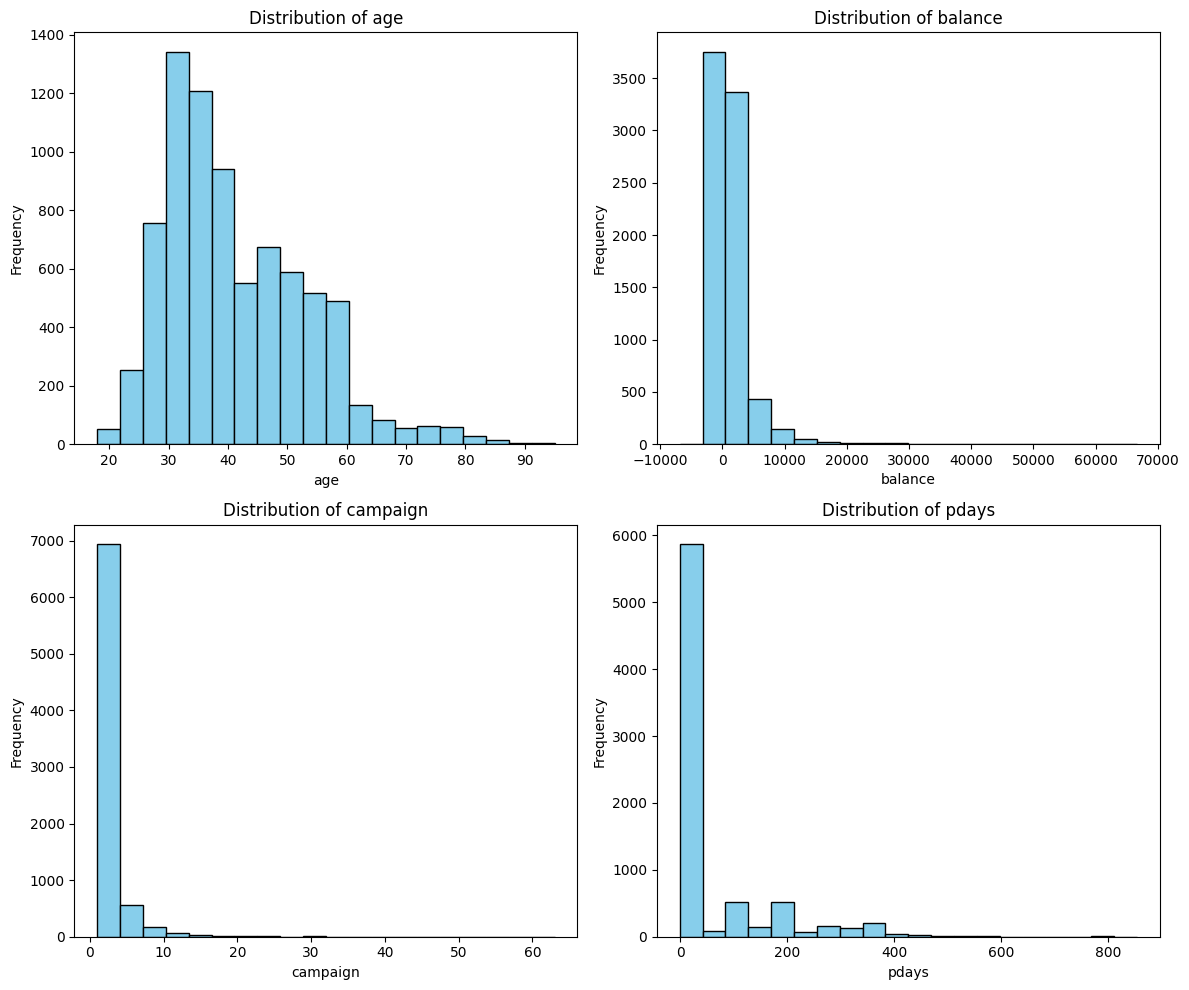

In [9]:
target_columns = ['age', 'balance', 'campaign', 'pdays']

#Crea subplots to display histograms 
fig, axes = plt.subplots(2,2, figsize=(12,10))
axes = axes.ravel() #Flatten the grid for easier iteration 

for i, col in enumerate(target_columns):
    axes[i].hist(df[col], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

#Adjust spacing and show the plot 
plt.tight_layout()
plt.show()





#### 1. As we can see, the age column is skewed toward young adult and middle age which are between 20 to 40 years old. We can also spot that there are few customers that are older than 60 
#### 2. The balance column is highly right skewed with most balance near 0 and we can see there are few customers that having high balance up to 70,000 (we can call these outliers)
#### 3. Throughthe graph above we can see that most customers were contacted fewer than 5 times and there are few customers hat are contacted more  than 10 times. 
#### 4. The pdays column has a strong spike at 0 which means that many custoers were not contacted in  the previous campaign 

#### To improve clarity, let's group some jobs together. Here we will group them into several 5 categories: blue collar (for manual ), self employed, not working, retired and white collar 

In [10]:
job_groups = {
    'housemaid' : 'blue-collar',
    'services' : 'blue-collar',
    'self-employed' : 'self-employed',
    'entrepreneur' : 'self-employed',
    'student' : 'not-working',
    'unemployed' : 'not-working',
    'management' : 'white-collar',
    'admin.' : 'white-collar',
    'technician' : 'white-collar'
}



In [11]:
df['job'] = df['job'].replace(job_groups)

#### lets check again the values in the job column 

In [12]:
df['job'].value_counts()

job
white-collar     4019
blue-collar      2188
retired           540
self-employed     516
not-working       496
unknown            54
Name: count, dtype: int64

In [13]:
df['contact'].value_counts()

contact
cellular     5628
unknown      1639
telephone     546
Name: count, dtype: int64

In [14]:
df['poutcome'].value_counts()

poutcome
unknown    5819
failure     848
success     761
other       385
Name: count, dtype: int64

#### Here we want to know if the campaign works or not, so lets combine other and failure as non successful

In [15]:
df['poutcome'] = df['poutcome'].replace({'failure': 'not-success', 'other' :'not-success', 'not-sucess': 'not-success'})

### Lets check the relation to the response column 

#### The reason we are checking the relation to the response column is because we want to identify which features that significantly influence the likehood of someone to subscribe (yes or no)
#### Other than that, through checking the relation between these solumns to the target columns, we can see how characteristic in customers differ. But before we do that, lets check the number f yes and no values in the response column deposit 

<Axes: title={'center': ' Value Counts of Deposits'}, xlabel='deposit'>

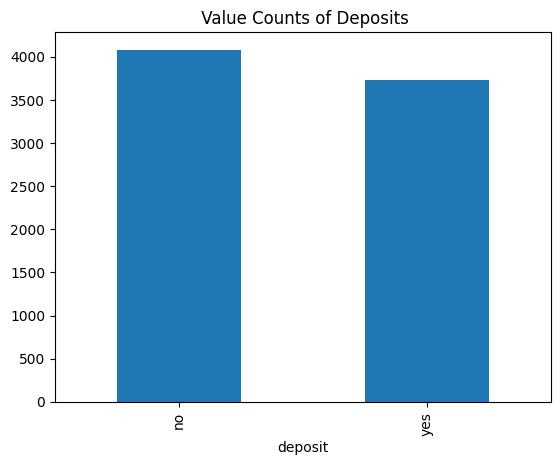

In [17]:
deposit_counts = df['deposit'].value_counts()
deposit_counts.plot.bar(title = " Value Counts of Deposits")

#### As we can see the deposit column or the target column has fairly balance distribution between yes and no therefore accuracy can be used as a metric for model evaluarion 

#### lets see how deposit column values varies on other categorical columns values 

In [18]:
#marital status and deposit 

contact_deposit = pd.DataFrame()

contact_deposit['yes'] = df[df['deposit'] == 'yes']['contact'].value_counts()
contact_deposit['no'] = df[df['deposit'] == 'no']['contact'].value_counts()

<Axes: title={'center': 'Type of Contact and Deposit'}, xlabel='contact'>

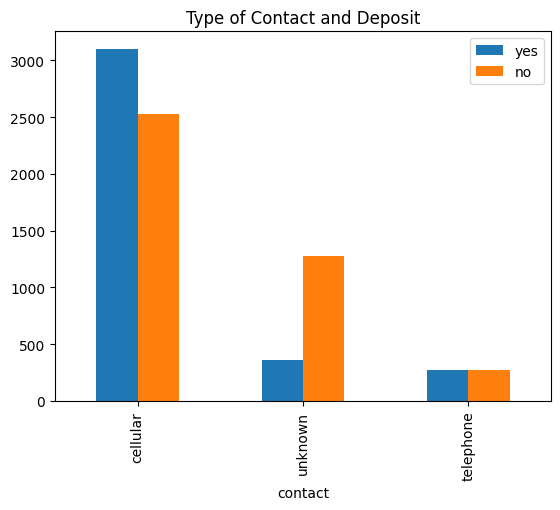

In [19]:
contact_deposit.plot.bar(title="Type of Contact and Deposit")

<Axes: title={'center': 'Job and Deposit'}, xlabel='job'>

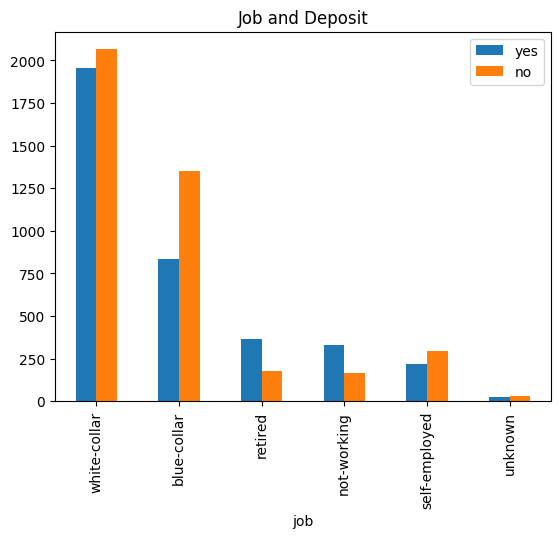

In [20]:
# Job and deposit 

job_deposit = pd.DataFrame()

job_deposit['yes'] = df[df['deposit'] == 'yes']['job'].value_counts()
job_deposit['no'] = df[df['deposit'] == 'no']['job'].value_counts()

job_deposit.plot.bar(title = "Job and Deposit")

<Axes: title={'center': 'Housing Loan and Deposit'}, xlabel='housing'>

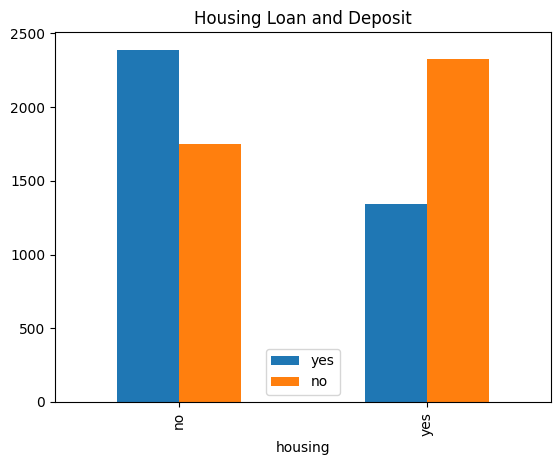

In [21]:
# housing and depost 

housing_deposit = pd.DataFrame()

housing_deposit['yes'] = df[df['deposit'] == 'yes']['housing'].value_counts()
housing_deposit['no'] = df[df['deposit'] == 'no']['housing'].value_counts()

housing_deposit.plot.bar(title="Housing Loan and Deposit")

<Axes: title={'center': 'Loan Taking and Deposit'}, xlabel='loan'>

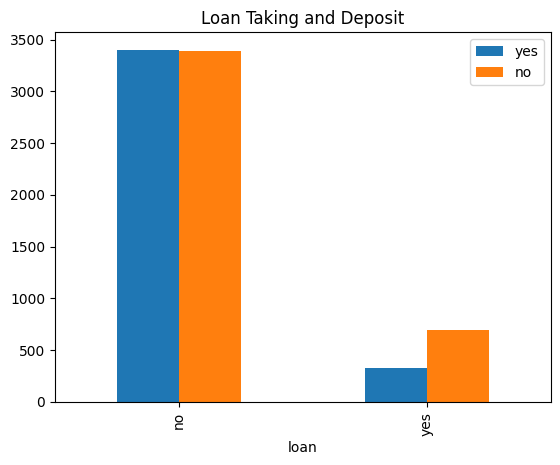

In [22]:
#Loan and Deposit 

loan_deposit = pd.DataFrame()

loan_deposit['yes'] = df[df['deposit'] == 'yes']['loan'].value_counts()
loan_deposit['no'] = df[df['deposit'] == 'no']['loan'].value_counts()

loan_deposit.plot.bar(title="Loan Taking and Deposit")

<Axes: title={'center': 'Last Month Contact and Deposit'}, xlabel='month'>

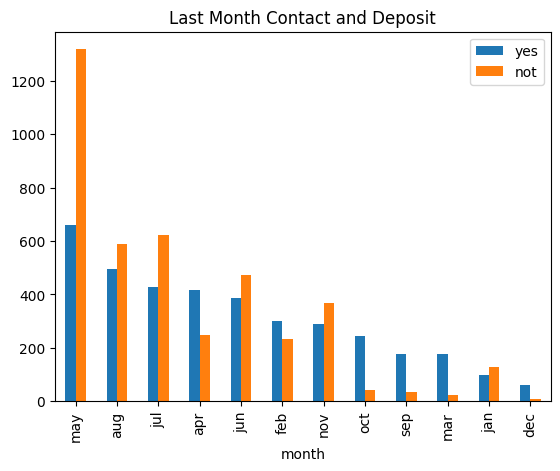

In [23]:
#month and deposit 

month_deposit = pd.DataFrame()

month_deposit['yes'] = df[df['deposit'] == 'yes']['month'].value_counts()
month_deposit['not'] = df[df['deposit'] == 'no']['month'].value_counts()

month_deposit.plot.bar(title="Last Month Contact and Deposit")

<Axes: title={'center': 'Poutcome and Deposit'}, xlabel='poutcome'>

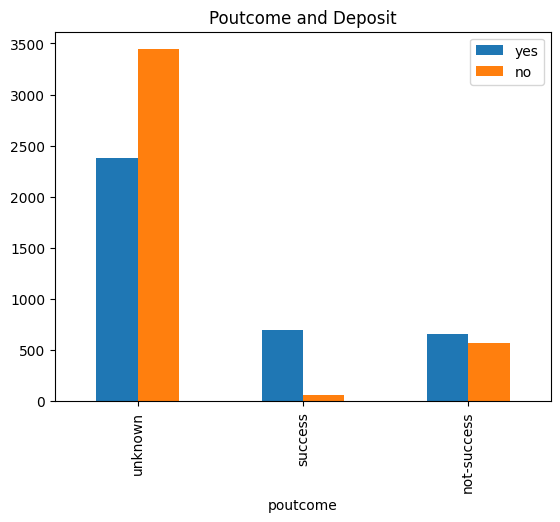

In [24]:
#poutcome and deposit 

outcome_deposit = pd.DataFrame()

outcome_deposit['yes'] = df[df['deposit'] == 'yes']['poutcome'].value_counts()
outcome_deposit['no'] = df[df['deposit'] == 'no']['poutcome'].value_counts()

outcome_deposit.plot.bar(title="Poutcome and Deposit")

### Regarding the graphs above, we can tell that according to our dataset that <br>
1. most customer that are contacted by cellular agreed to term deposit. it seems like celullar are the most effective method but we still need to optimize the strategy here to increase the conversion rates <br>
2. As we can see the “yes” count on the retired and not working individuals are higher compared to the ”no” count. Meanwhile the working individuals whether white-collar, blue collar, and self employed are less likely to subscribe to the term deposit. This could inidcate that working individuals might prefer liquid financial options due to their ongoing expenses. Meanwhile for the retired and not working group these group might have more disporable income. <br>
3. Customers without the housing loan are more likely to agree to a term deposit than those with the housing loan. We can indicate that these customers may have fewer financial obligations and more disposbale income that can be the reason why they are more likely to agree on the term deposit. <br>
3. From the graph above we can also say that may is the highest number of custmer contact. This can indicate a high volume of outreach but not very efficient in tern of conversion. We can also spot that months like april, feb, october, september march, and december we have more customer conversion. <br>
4. From the poutcolumn graph we can see that we have many noise where we do not recorded the outcome of the previous campaign. We can also see that on not success outcomes there is a fairly split between yes and no aith yes slightly higher than the no responses. This may indicate that these customers may still be valuable but may need a targeted approcah 

### After checking the categorical columns, let check on the numerical columns to understand their affect on the term deposit. First lets understand the relationship between the account balance and the likelihood of subscribing to a term deposit 

In [25]:
#balance and the term deposit

balance_deposit = pd.DataFrame()
balance_deposit['yes']= (df[df['deposit']=='yes'][['deposit', 'balance']].describe())['balance']
balance_deposit['no'] = (df[df['deposit'] == 'no'][['deposit', 'balance']].describe())['balance']

balance_deposit

,yes,no
count,3732.000000,4081.000000
mean,1811.527331,1238.946582
std,3262.878530,2895.011315
min,-3058.000000,-6847.000000
25%,215.000000,64.000000
50%,752.000000,410.000000
75%,2172.750000,1296.000000
max,52587.000000,66653.000000


<Axes: title={'center': 'Balance and Deposit Statistic'}>

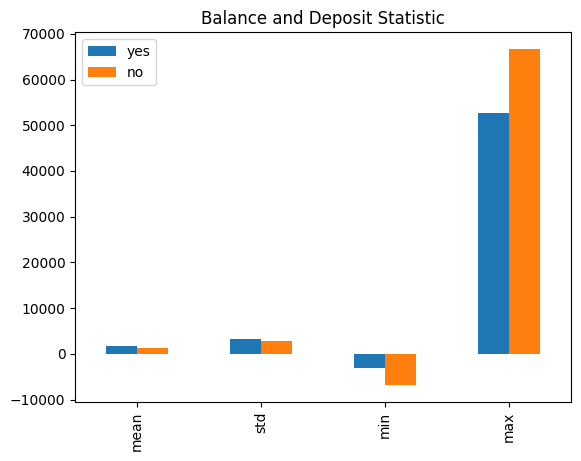

In [26]:
#drop percentile 
balance_deposit.drop(["count","25%", "50%", "75%"]).plot.bar(title="Balance and Deposit Statistic")

<Axes: title={'center': 'Age and Deposit Statistic'}>

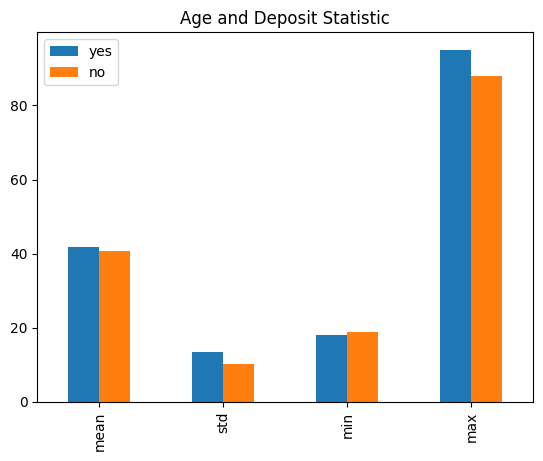

In [27]:
#age and term deposit 
age_deposit = pd.DataFrame()
age_deposit['yes'] = (df[df['deposit'] == 'yes'][['age','deposit']].describe())['age']
age_deposit['no'] = (df[df['deposit'] == 'no'][['age','deposit']].describe())['age']

age_deposit.drop(["count","25%", "50%", "75%"]).plot.bar(title="Age and Deposit Statistic")

<Axes: title={'center': 'Number of Contact Perfomed During This Campaign and Deposit Statistic '}>

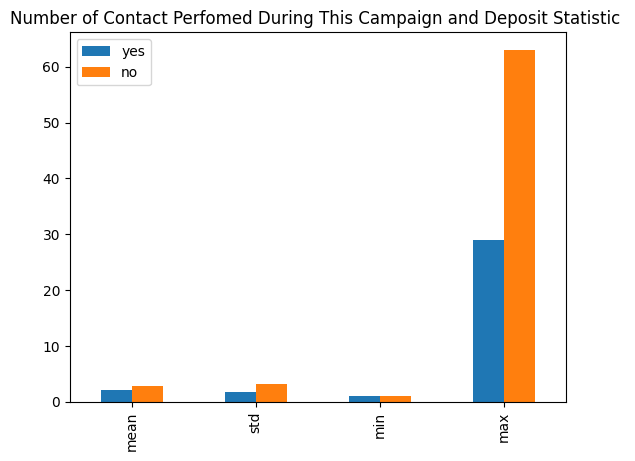

In [28]:
#campaign and term deposit 

campaign_deposit = pd.DataFrame()

campaign_deposit['yes'] = (df[df['deposit'] == 'yes'][['campaign','deposit']].describe())['campaign']
campaign_deposit['no'] = (df[df['deposit']== 'no'][['campaign','deposit']].describe())['campaign']

campaign_deposit.drop(["count", "25%", "50%", "75%"]).plot.bar(title="Number of Contact Perfomed During This Campaign and Deposit Statistic ")

<Axes: title={'center': 'Number of days after the client was contacted last time and Deposit Statistic'}>

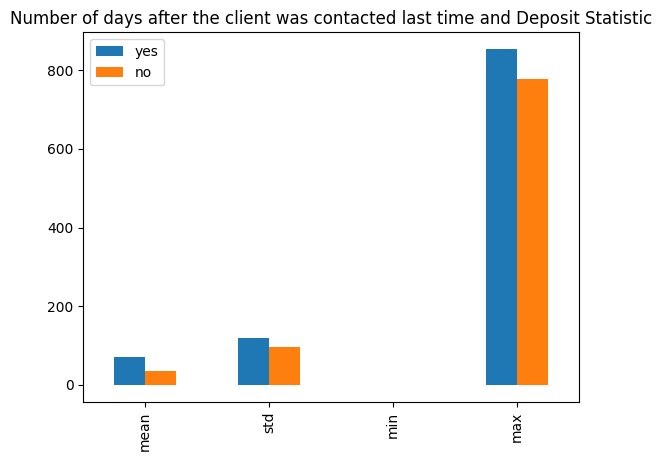

In [29]:
#pdays and deposit 

pdays_depo = pd.DataFrame()

pdays_depo['yes'] = (df[df['deposit'] == 'yes'][['pdays', 'deposit']].describe())['pdays']
pdays_depo['no'] = (df[df['deposit'] == 'no'][['pdays', 'deposit']].describe())['pdays']

pdays_depo.drop(["count", "25%", "50%", "75%"]).plot.bar(title="Number of days after the client was contacted last time and Deposit Statistic")

### Insights:<br>
1. From the balance and deposit statistic, we can get several insight from this graph; cusomer who aggreed to subscribe (yes) have a higher mean balance than those hwo did noyt which mean customers with higher average balances are more likely to subscrbive. Additionally the maximum balance for non subsciber is higher than for yes subscriber. This suggest that some extremely wealthy customers prefer other financial products or investments. <br>
2. From the age and deposit statistic, we can get several insights; the mean age for subscriber (yes) is slightly higher than for non-subscriber which mean older customer are more likley to subscriive to a term deposit. This assumption is supported on the maximum graph where the maximum age for subscribers is slighly higher than non subscribers. And based on the Standard deviation, we can see that  subscribers tend to belong to a narrower age range indicating that certain age groups may be more inclined toward term deposits. <br>
3. On the number of days after the client was contacted last time and deposit statistic column we can get several insights: The mean value of pdays for subscribers(yes) is slightly higher than non subscriber which could indicates customers that were contacted after a longer interval since the last campaign may be slightly more likely to subscribe. This assumption is suported by the STD and maximum graph where customers who had not been contacted for a very long time were still willing to subscribe when approached again. <br>
4. Based on the number os contacts during this campaign and deposit, we can get several insights: the mean umber of contacts for subscriber (yes) is slightly lowen than non subscriber (no). This indicated custmers who got excessive follows up maybe reduce the likelihood of conversion. This assumptions is suported with the maximum bar where we can see that the non subscriber bar is significanty higher which mean that some customers that are contacted with a very high number of times still did not convert or subscribe. 

In [30]:
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,white-collar,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,white-collar,3025,no,no,cellular,may,1,352,not-success,yes
3,38,blue-collar,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,blue-collar,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,blue-collar,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,blue-collar,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,white-collar,54,yes,no,cellular,nov,1,-1,unknown,no


#### Lets check  the correlation between variables first. But since we have some categorical data, lets encode them into numbers


In [31]:
#One hot encoding 
encoded_data = pd.get_dummies(df[['job', 'housing', 'loan', 'contact', 'month', 'poutcome']])

In [32]:
#Merge encoded data with numeric variables 
full_data = pd.concat([df[['age','balance', 'campaign', 'pdays']], encoded_data], axis=1)

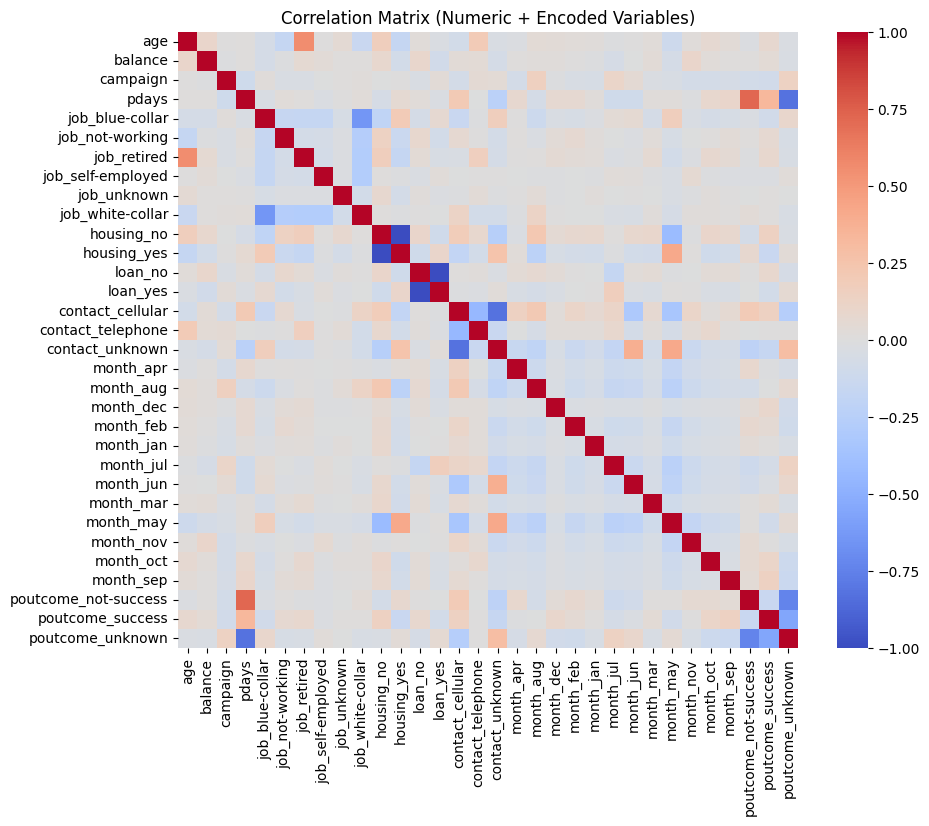

In [33]:
#check correlation metrix 
correlation_matrix = full_data.corr()

#visualize the corelation matrix 
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix (Numeric + Encoded Variables)")
plt.show()

#### As we can see, most of the variables have weak correlation but we can spot there is an interesting pattern in pdays. Lets investigae the relationship between pdays and poutcome 

In [34]:
#check the correlation between pdays and poutcome_not-sucess
correlation = full_data['pdays'].corr(full_data['poutcome_not-success'])
print(f"Correlation between pdays and poutcome_not_success: {correlation:.2f}")

Correlation between pdays and poutcome_not_success: 0.72


#### Lets do the rest to poutcome_success and poutcome_unknown columns

In [35]:
#Check the correlation between pdays and poutcome_sccess
correlation_1 = full_data['pdays'].corr(full_data['poutcome_success'])
print(f"Correlation between pdays and poutcome_success: {correlation:.2f}")

#Check the correlation between pdays and poutcome_unknown 
correlation_2 = full_data['pdays'].corr(full_data['poutcome_unknown'])
print(f"Correlation between pdays and poutcome_unknown: {correlation:.2f}")

Correlation between pdays and poutcome_success: 0.72
Correlation between pdays and poutcome_unknown: 0.72


#### As we can see  the correality is 0,72 which mean there is a positive correlation beteeen pdays and poutcome. Mean when one variable increase  then the other cariable tend  to increase aswell. <br>

#### from out previous analysis. Lets drop one of these columns to avoidr redudancy. In this case we weill drop pdays

In [36]:
#lets check out dataframe first 
df

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,white-collar,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,white-collar,3025,no,no,cellular,may,1,352,not-success,yes
3,38,blue-collar,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,blue-collar,205,yes,no,telephone,nov,4,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
7808,62,blue-collar,2,no,no,cellular,nov,1,-1,unknown,yes
7809,48,blue-collar,5473,no,no,cellular,feb,2,184,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,no
7811,31,white-collar,54,yes,no,cellular,nov,1,-1,unknown,no


#### Lets drop pdays as we said earlier that we are not going to use them

In [37]:
df = df.drop(columns='pdays')

In [38]:
df

,age,job,balance,housing,loan,contact,month,campaign,poutcome,deposit
0,55,white-collar,1662,no,no,cellular,jun,2,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,unknown,yes
2,51,white-collar,3025,no,no,cellular,may,1,not-success,yes
3,38,blue-collar,-87,yes,no,cellular,may,1,unknown,no
4,36,blue-collar,205,yes,no,telephone,nov,4,unknown,no
...,...,...,...,...,...,...,...,...,...,...
7808,62,blue-collar,2,no,no,cellular,nov,1,unknown,yes
7809,48,blue-collar,5473,no,no,cellular,feb,2,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,unknown,no
7811,31,white-collar,54,yes,no,cellular,nov,1,unknown,no


In [39]:
#Define feature and target columns 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Define feature and target columns 
X = df.drop(columns=['deposit'])
y = df['deposit']

In [40]:
#Encoe the target variable 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y) #This will convert "yes" to 1 and "no" tp 0

In [41]:
df

,age,job,balance,housing,loan,contact,month,campaign,poutcome,deposit
0,55,white-collar,1662,no,no,cellular,jun,2,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,unknown,yes
2,51,white-collar,3025,no,no,cellular,may,1,not-success,yes
3,38,blue-collar,-87,yes,no,cellular,may,1,unknown,no
4,36,blue-collar,205,yes,no,telephone,nov,4,unknown,no
...,...,...,...,...,...,...,...,...,...,...
7808,62,blue-collar,2,no,no,cellular,nov,1,unknown,yes
7809,48,blue-collar,5473,no,no,cellular,feb,2,success,yes
7810,36,unknown,179,no,no,cellular,aug,8,unknown,no
7811,31,white-collar,54,yes,no,cellular,nov,1,unknown,no


In [42]:
#Categorize the columns 
numeric_features = ['age', 'balance', 'campaign']
categorical_features = ['job', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [43]:
#Preprocessing pipelines 
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


In [44]:
#Combine into columntransformer 
preprocessor = ColumnTransformer(
    transformers =[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [45]:
#Train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
#fit the processor ontraining data and transform 
X_train_transformed = preprocessor.fit_transform(X_train)

#Transfrom the  test data 
X_test_transformed = preprocessor.transform(X_test)

In [47]:
print("Transformed Training Data Shape:", X_train_transformed.shape)

Transformed Training Data Shape: (6250, 25)


### Modeling and Evaluation 

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd 

logreg= LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

#### Lets apply these model and see the precision metric 

In [49]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

models = [logreg, knn, dt, rf, xgb, lgbm]
score = []
avg = []
std = []

for i in models:
    skfold = StratifiedKFold(n_splits = 5)
    estimator = Pipeline([
        ('preprocess', preprocessor),
        ('model', i)
    ])

    #Use precision as the scoring metric 
    model_cv = cross_val_score(estimator, X_train, y_train, cv=skfold, scoring='roc_auc')

    score.append(model_cv)
    avg.append(model_cv.mean())
    std.append(model_cv.std())

#Create a summary Dataframe 
results = pd.DataFrame({
    'model' : ['LogisticRegression', 'KKN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'],
    'mean roc_auc' : avg,
    'sdev': std
})

print(results)

[LightGBM] [Info] Number of positive: 2386, number of negative: 2614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477200 -> initscore=-0.091263
[LightGBM] [Info] Start training from score -0.091263
[LightGBM] [Info] Number of positive: 2386, number of negative: 2614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 25
[LightGBM] [Info] [binary:

#### From the result, as we can see the LightGBM achieves the highest mean of ROC AUC, inidicate that this is the most effective model at distingusing between t he positive and negative classes, then followed with XGBoost as the second best model and other

In [50]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Using the best model (lgbm)
best_model = lgbm  
best_model.fit(X_train_transformed, y_train)

# Predict probabilities and classes on the test set
y_test_probs = best_model.predict_proba(X_test_transformed)[:, 1]  # Probabilities for the positive class
y_test_pred = best_model.predict(X_test_transformed)  # Class predictions

# Evaluate metrics
roc_auc = roc_auc_score(y_test, y_test_probs)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Test ROC AUC: {roc_auc:.3f}")
print(f"Test Precision: {precision:.3f}")
print(f"Test Recall: {recall:.3f}")
print(f"Test F1-Score: {f1:.3f}")

# Classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


[LightGBM] [Info] Number of positive: 2983, number of negative: 3267
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 6250, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477280 -> initscore=-0.090943
[LightGBM] [Info] Start training from score -0.090943
Test ROC AUC: 0.778
Test Precision: 0.748
Test Recall: 0.637
Test F1-Score: 0.688

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.80      0.75       814
           1       0.75      0.64      0.69       749

    accuracy                           0.72      1563
   macro avg       0.73      0.72      0.72      1563
weighted avg       0.73      0.72      0.72      1563


Confusion Ma

#### Model Performance Evaluation <br>
The model achieves a score of 0.778, which is considered moderate. This indicates that the model is doing a decent job ranking positive cases (customers likely to agree to a term deposit) higher than negative cases. However, there is room for improvement.<br>
The precision score is 0.716, meaning that 71.6% of the cases predicted as positive (likely to agree) are correct. This is a fairly good precision, indicating the model reasonably minimizes false positives.<br>
#### Model Goals and Metric Selection <br>
The primary goal is to identify customers likely to agree to a term deposit.
Since the dataset is relatively balanced, we can consider ROC-AUC as a primary metric. ROC-AUC evaluates the model's ability to rank customers correctly by assigning:<br>
Higher probability scores to customers likely to agree.
Lower probability scores to those unlikely to agree.
A high ROC-AUC score ensures the model effectively ranks customers, enabling better targeting decisions. <br>
#### Business Impact<br>
By focusing on customers with the highest probability scores, the marketing team can maximize ROI by targeting resources on the most promising prospects, thereby improving campaign efficiency.

#### lets compare models on test data 

In [51]:
results = []
for model_name, model in zip(['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'], models):
    model.fit(X_train_transformed, y_train)
    y_test_probs = model.predict_proba(X_test_transformed)[:, 1]
    roc_auc = roc_auc_score(y_test, y_test_probs)
    results.append((model_name, roc_auc))
# Create a DataFrame to summarize
results_df = pd.DataFrame(results, columns=['Model', 'Test ROC AUC'])
print(results_df)


[LightGBM] [Info] Number of positive: 2983, number of negative: 3267
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 398
[LightGBM] [Info] Number of data points in the train set: 6250, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477280 -> initscore=-0.090943
[LightGBM] [Info] Start training from score -0.090943
                 Model  Test ROC AUC
0  Logistic Regression      0.772991
1                  KNN      0.733337
2        Decision Tree      0.645938
3        Random Forest      0.765076
4              XGBoost      0.767429
5             LightGBM      0.778344


#### As we can see, LightLGM is still the best model so far. Followed with Logistic Regression with score 0.757. Since our data is fairly balance, we dont do oversampling here. lets move directly to hyperparameter tuning to improve our model's performance

In [52]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV



In [53]:


model = Pipeline([
    ('preprocess', preprocessor),  # Preprocessing step
    ('model', LGBMClassifier(random_state=42))  # LightGBM model
])


param_grid = {
    'model__n_estimators': [100, 200, 300],  
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    estimator=model,  
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=1
)


# Fit the model
grid_search.fit(X_train, y_train)

# Output best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC:", grid_search.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 2386, number of negative: 2614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477200 -> initscore=-0.091263
[LightGBM] [Info] Start training from score -0.091263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

#### After tuned we can see that the LightGBM model achiees a ROC AUC of 0.758

#### Lets tuned the model on the test daata 

In [54]:
best_model = grid_search.best_estimator_
y_test_probs = best_model.predict_proba(X_test)[:, 1]
y_test_pred = best_model.predict(X_test)

from sklearn.metrics import roc_auc_score, classification_report
print("Test ROC AUC:", roc_auc_score(y_test, y_test_probs))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))


Test ROC AUC: 0.786838634969476
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       814
           1       0.77      0.63      0.69       749

    accuracy                           0.73      1563
   macro avg       0.74      0.73      0.73      1563
weighted avg       0.74      0.73      0.73      1563



#### Lets try the second tuning 

In [55]:
# Second Tuning Pass (Fine-Tuning)
param_grid_fine = {
    'model__n_estimators': [80, 100, 120],
    'model__learning_rate': [0.05, 0.1, 0.15],
    'model__max_depth': [2, 3, 4]
}

grid_search_fine = GridSearchCV(
    estimator=model,  # Use the same pipeline
    param_grid=param_grid_fine,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=1
)

grid_search_fine.fit(X_train, y_train)

print("Fine-Tuned Best Parameters:", grid_search_fine.best_params_)
print("Fine-Tuned Best ROC AUC:", grid_search_fine.best_score_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 2386, number of negative: 2614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 392
[LightGBM] [Info] Number of data points in the train set: 5000, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477200 -> initscore=-0.091263
[LightGBM] [Info] Start training from score -0.091263
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

#### Lets test the second tuning on our test data 

In [56]:
#Retrieve our best model 
best_model_sec = grid_search_fine.best_estimator_

#Test predictions 
y_test_probs_sec = grid_search_fine.best_estimator_.predict_proba(X_test)[:,1]
y_test_pred_sec = grid_search_fine.best_estimator_.predict(X_test)

print("Test ROC AUC:", roc_auc_score(y_test, y_test_probs_sec))
print("Classification Report:")
print(classification_report(y_test, y_test_pred_sec))

Test ROC AUC: 0.7848736890792967
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       814
           1       0.76      0.61      0.68       749

    accuracy                           0.72      1563
   macro avg       0.73      0.72      0.72      1563
weighted avg       0.73      0.72      0.72      1563



#### Lets check Feature Importance

                   Feature  Importance
0                 num__age         134
1             num__balance         106
2            num__campaign          69
11    cat__contact_unknown          35
8         cat__housing_yes          32
19          cat__month_may          28
20          cat__month_nov          25
23   cat__poutcome_success          22
24   cat__poutcome_unknown          21
10  cat__contact_telephone          17
12          cat__month_aug          17
17          cat__month_jun          16
22          cat__month_sep          16
9            cat__loan_yes          15
15          cat__month_jan          15
18          cat__month_mar          15
21          cat__month_oct          15
13          cat__month_dec          13
7    cat__job_white-collar          12
16          cat__month_jul          10
3     cat__job_not-working           7
5   cat__job_self-employed           3
14          cat__month_feb           2
6         cat__job_unknown           0
4         cat__job_retire

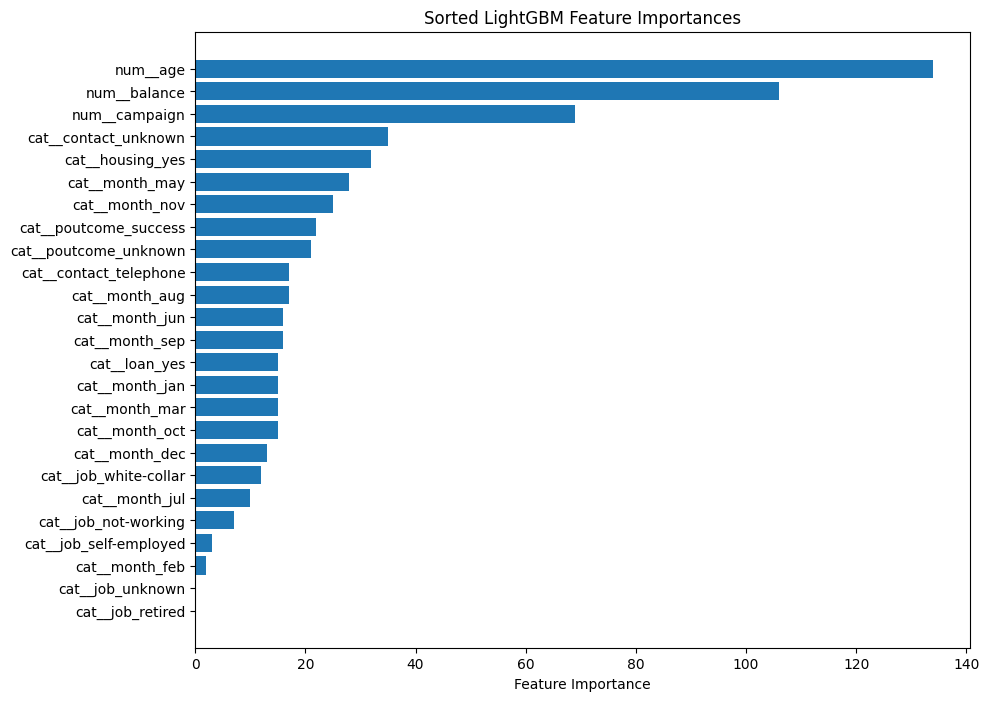

In [57]:
# Extract transformed feature names
feature_names = preprocessor.get_feature_names_out()

# Extract feature importances
feature_importances = best_model.named_steps['model'].feature_importances_

# Ensure lengths match
assert len(feature_names) == len(feature_importances), "Mismatch between feature names and importances"

# Combine feature names and importances into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display sorted feature importances
print(sorted_features)

# Plot sorted feature importances
plt.figure(figsize=(10, 8))
plt.barh(sorted_features['Feature'], sorted_features['Importance'])
plt.xlabel("Feature Importance")
plt.title("Sorted LightGBM Feature Importances")
plt.gca().invert_yaxis()
plt.show()


#### Insight on feature importantce<br>
As you can see from the graph result, as for our LGBM model the most important features are age followed by balance and campaign. For the top 3 of most important feature as we can see age and balance might be generic but not with campaign which means this model will work better with customer that have past campaign history. 

### Marketing Strategy with this model <br>
This model work better in scenario where the marketing team run generic campaign to target all customers wo this strategy could provide some baseline data and populate some historical feature for the model to learn from<br>
After gathering customers responses data, we then can use the model to identify high probability customers to target with targeted campaigns.
<br>
<br>



#### This model has potential in helping to optimize and efficient marketing budget <br>
Running generic campaigns over and over again can cost alot since generic campaign do not really resonate with all customers therefore the conversion might be low <br>
This model can identify high probabily customers that are likely to aggree on term deposit and therefore can be targeted with more specific and personalized campaign that potentially help the ROI and efficient the budget


In [58]:
#Classification report 

from sklearn.metrics import classification_report, roc_auc_score, precision_score, recall_score, f1_score

# Get predictions
y_test_pred = best_model.predict(X_test)
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Additional metrics
roc_auc = roc_auc_score(y_test, y_test_probs)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Test ROC AUC: {roc_auc:.3f}")
print(f"Test Precision: {precision:.3f}")
print(f"Test Recall: {recall:.3f}")
print(f"Test F1-Score: {f1:.3f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       814
           1       0.77      0.63      0.69       749

    accuracy                           0.73      1563
   macro avg       0.74      0.73      0.73      1563
weighted avg       0.74      0.73      0.73      1563

Test ROC AUC: 0.787
Test Precision: 0.771
Test Recall: 0.629
Test F1-Score: 0.693


### Interpret the Report with Scenario <br>
If our model is used to filter the customer list, it can reduce 83% of uninterested customers from being approached and correctly identify 69% of interested customers to be approached. The model has an accuracy of 77% in predicting customers who are genuinely interested. This means that every time the model predicts a customer is interested, there is a 77% probability that the prediction is correct. Meanwhile, 17% of uninterested customers are predicted as interested, based on the overall number of uninterested customers.

##### Scenario <br>
Based on https://startuptalky.com/cac-by-industry it costumer acquisition for banking industry cost $303 where the cost basically heavy on the telemarketing. 
Lets saay we have 200 list of customer (100 people interested and other 100 people uninterested)<br>
##### Without the model <br>
- Total cost = $303 x 200 = $60,600 <br>
- Total wasted payout = $303 x 100 = $30,3000 of wasted payout for targeting uninterested customers<br>
##### With the model <br>
- Total cost (77 x $303) + (17  x $303) = $23,331 + $5,151 = $28,482 <br>
- total of interested customers obtained = 77 people <br>
-  total of interested customers but are not obtained = 23 people <br>
- total of wastd payout = 17 x $303 = $5,151 <br>
- budget saved = 83 x $303 = $25,0549 <br>

### Key Insights: <br>
1. It helps to reduce cost:<br>
Targeted campaign help to reduce 53.02% (from $60,600 to $28,482) <br>
2. Higher conversion <br>
By prioritizing high and medium likelihood, the model can result in higher conversion. <br>
3. Cost efficiency <br>
The cost per conversion before the model <br>
- Total cost without the model / interested customers = 60,600 / 100 = 606 USD/conversion <br>
The cost per conversion after the model <br>
- Total cost with teh model / interested customers = 28,482 / 77 = 369 USD/conversion <br>
With the model, the model reduces the total cost cost from $60,600 to $28,482, saving 53% of the budget <br>
Wasted payout drops significantly from $30,300 to $5,151, a reduction of 83% <br>



### Conclusion and Recommendation <br>
1. The Model Can Improve Marketing Efficiency
Precise Targeting
The model uses customer data to predict which individuals are more likely to agree to a term deposit, effectively ranking customers by their likelihood of conversion.
Higher Conversion and Lower Costs
By identifying and focusing on customers who are likely to agree, the model improves the overall conversion rate.2. Business Strategy
2. Segmentation
The model allows segmentation of customers into groups based on their likelihood of conversion
Different Marketing Approaches for Each Segment
High Likelihood Customers:
Personalized Marketing:
Strategies like customized emails or telemarketing can be used to engage these customers directly.
Example: Including personalized recommendations or offers in emails to make them feel valued.
Investment Justification:
Since these customers are more likely to agree, investing in higher-cost strategies (e.g., phone calls) is justified.
Medium Likelihood Customers:
Cost-Effective Strategies:
Use methods like generic email campaigns or SMS marketing, which are less expensive but still reach potential converters.

In [59]:
#combine preprocessing and use the bes model into the pipeline 
export_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", best_model)
])

In [60]:
#save model 
import joblib

joblib.dump(export_model, 'LGMBbest_modelexport.pkl')

['LGMBbest_modelexport.pkl']